<a target="_blank" href="https://colab.research.google.com/github/SalRmz/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/proyecto01/death_and_pollution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Muertes y Contaminación en México 2019-2022

## Equipo 6
- Javier De La Rosa Mondragón
- Julio Pinzón
- Luis Fernando Merino
- Salomón Rmz

## Datasets disponibles en:
https://drive.google.com/drive/folders/1ha2rOZAKgukpHgsFbBi2vnnuWlItuc_S?usp=sharing

![Contaminación](./contaminacion-monterrey-696x392.jpg)




## Resumen de los sets de datos
### Mexico Hourly Air Pollution (2010-2021)
Este set de datos incluye tres archivos:
    - Hourly Stations: cada fila son mediciones de una estación en cierta hora (de un día en particular)
    - Daily Stations: cada fila son los promedios por día de las mediciones de una estación en un cierto día
    - Stations: datos de cada una las estaciones pero muy incompletos, afortunadamente incluye las coordenadas para cada estación
    
#### Fuente:
- https://www.kaggle.com/datasets/elianaj/mexico-air-quality-dataset?select=stations_daily.csv
    
### Deaths in Mexico
Este set es un solo archivo de registros de defunciones. Cada fila es una defunción ocurrida en cierto día, su causa, el código del estado donde ocurrió.

#### Fuentes:
- http://www.dgis.salud.gob.mx/contenidos/basesdedatos/da_defunciones_gobmx.html
- https://www.kaggle.com/datasets/tavoglc/mortality-in-mexico    

### Catálogo Único de Claves de Áreas Geoestadísticas Estatales, Municipales y Localidades
(Dataset auxiliar)
Este dataset del INEGI contiene información del los códigos de los estados del país y áreas geoestadísticas, e incluye las coodernadas geográficas de cada una de dichas áreas.
Con esta información es posible completar las tablas de estaciones del set de contaminación (usando las coordenadas de cada estación), así como añadir el nombre del estado a los registros de defunciones del set de muertes.
#### Fuente:
- https://www.inegi.org.mx/app/ageeml/


## Objetivo
Crearemos un set de datos consolidado que combine los datos diarios de muertes por enfermedades respiratorias y niveles de contaminación de partículas PM10 y PM2.5 durante los años 2019 a 2022. Veremos los datos de las 5 entidades con más muertes por enfermedades de vias respiratorias en el periodo 2019-2022 que incluye periodos de pre-pandemia y pandemia de COVID-19.

In [1]:
# importamos las bibliotecas requeridas
import pandas as pd

# visualización:
import matplotlib.pyplot as plt
import seaborn as sns

# auxiliares
import datetime

## Dataset de muertes en México

In [2]:
## Lectura de datos del dataset
muertesDf = pd.read_csv("./data/deaths_mexico/defunciones.csv")
## Impresion de dimensiones
muertesDf.shape

(2773923, 10)

In [3]:
# como nos nos interesan todos los campos, descartaremos los que no necesitamos ()
muertesDf.drop(['Unnamed: 0','tod','tod_float','tod_norm','mes_ocurr'], axis=1, inplace=True)
# mostramos la información con tipos de datos
print(muertesDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773923 entries, 0 to 2773922
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   date            object
 1   gr_lismex       object
 2   gr_lismex_name  object
 3   ent_ocurr       int64 
 4   causa_def       object
dtypes: int64(1), object(4)
memory usage: 105.8+ MB
None


In [4]:
# vemos que date tiene tipo object (string) y como manipularemos fechas, convirtámoslo a datetime de pandas
print(muertesDf.date.head())
muertesDf.date = pd.to_datetime(muertesDf.date)
print(muertesDf.date.head())

0    2020-01-22
1    2020-01-04
2    2020-01-15
3    2020-01-23
4    2020-01-20
Name: date, dtype: object
0   2020-01-22
1   2020-01-04
2   2020-01-15
3   2020-01-23
4   2020-01-20
Name: date, dtype: datetime64[ns]


In [5]:
# veremos las fechas de inicio y fin de nuestros datos de muertes en México
print('rango de fechas de los datos de muertes en Mexico:')
muertes_inicio = muertesDf.date.min()
muertes_fin = muertesDf.date.max()
print(muertes_inicio.strftime('%Y-%m-%d'), ' - ',muertes_fin.strftime('%Y-%m-%d'))

rango de fechas de los datos de muertes en Mexico:
2019-01-01  -  2021-12-31


<AxesSubplot: xlabel='Fecha', ylabel='Número de muertes'>

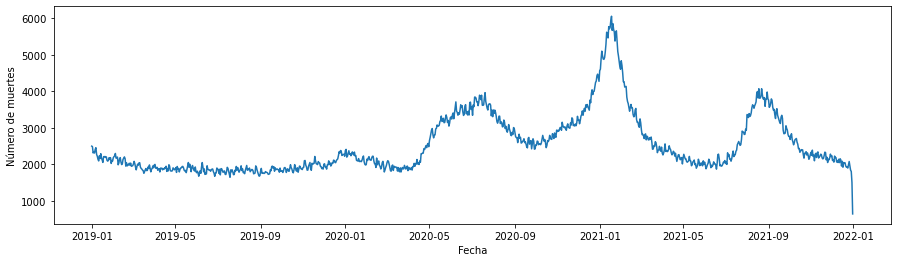

In [6]:
# podemos ver la distribución de las muertes (en todos los estados y por todas las causas):
fig, axs = plt.subplots(figsize=(15, 4))
plt.xlabel("Fecha")
plt.ylabel("Número de muertes")
data=muertesDf.groupby('date').ent_ocurr.size().to_frame() 
sns.lineplot(data=data, x=data.index, y=data.ent_ocurr)

In [7]:
# podemos comprar nuestros datos con
muertes2019 = muertesDf[(muertesDf.date>datetime.datetime(2019,1,1)) & (muertesDf.date<datetime.datetime(2019,12,31))].shape[0]/1000000
muertes2020 = muertesDf[(muertesDf.date>datetime.datetime(2020,1,1)) & (muertesDf.date<datetime.datetime(2020,12,31))].shape[0]/1000000
muertes2021 = muertesDf[(muertesDf.date>datetime.datetime(2021,1,1)) & (muertesDf.date<datetime.datetime(2021,12,31))].shape[0]/1000000
tablaMuertesXanio = pd.DataFrame(index=['2019','2020','2021'],columns=['millones de muertes'],data=[muertes2019,muertes2020,muertes2021])
tablaMuertesXanio
#tablaMuertesXanio.iloc[:,1]
# comparar con https://www.inegi.org.mx/temas/mortalidad/

,millones de muertes
2019,0.702926
2020,1.022835
2021,1.031558


In [8]:
import datetime
#type(muertesDf.iloc[1].ent_ocurr)
muertesDf.loc[ (muertesDf.date==datetime.datetime(2021,4,1))].shape[0]#.to_csv('./aux_outs/raro.csv')

2309

In [9]:
# trabajaremos con los 5 estados con más muertes por enfermedades respiratorias, veamos los códigos que usan para cada estado:
muertesDf.ent_ocurr.value_counts().sort_index()

1      24978
2      84049
3      13503
4      17908
5      65265
6      17734
7     100005
8      93059
9     320119
10     34511
11    141025
12     66006
13     58617
14    177608
15    317345
16    102293
17     51366
18     23762
19    104987
20     89841
21    158499
22     44709
23     28983
24     64826
25     62026
26     69387
27     55408
28     73141
29     29665
30    198863
31     50537
32     33898
Name: ent_ocurr, dtype: int64

Aquí se observa que el código corresponde al lugar en un orden alfabético para los nombres de estados. Más adelante agregaremos el nombre de los estados a esta tabla.

In [10]:
# vamos a obtener una tabla con las diferentes causas de muerte y su código y también el número
# de casos de cada categoría en orden descendiente
causasMuerte = muertesDf.groupby(['gr_lismex_name','gr_lismex']).size().sort_values(ascending=False).reset_index().rename(columns={0:'count'})
causasMuerte.to_csv('./aux_outs/causas.csv')
causasMuerte.head(10)

# los datos muestran que las enfermedades víricas son las causas más cómunes. también vemos que las causas
# no naturales tienen una letra E al inicio del código

,gr_lismex_name,gr_lismex,count
0,Enfermedades víricas,6,436340
1,Enfermedades isquémicas del corazón,28,431251
2,Enfermedades endocrinas y metabólicas,20,407892
3,Otras enfermedades del aparato respiratorio,33,240501
4,Enfermedades de otras partes del aparato diges...,35,205535
5,Enfermedades cerebrovasculares,30,103476
6,Agresiones,E55,89457
7,Enfermedades hipertensivas,27,85999
8,Tumores malignos de los órganos digestivos,9,83640
9,Enfermedades del aparato urinario,38,71003


In [11]:
# Podemos ver que hay códigos de causa de muerque que comienzan con la letra E
causasMuerte[causasMuerte.gr_lismex.str[0]=='E'].sort_values(by='count', ascending=False).head(10)
# (parece que las que comienzan con E son causas no naturales)

,gr_lismex_name,gr_lismex,count
6,Agresiones,E55,89457
12,Accidentes de transporte,E49,38610
13,"Otros accidentes, incluso los efectos tardíos",E51,38247
23,Lesiones autoinfligidas intencionalmente,E54,20016
29,Otra violencia,E56,14244
34,Caídas,E50,5508
37,"Envenenamiento accidental por, y exposición a ...",E53,3265
42,"Exposición al humo, fuego y llamas",E52,1600
45,"Contratiempos durante la atención medica, reac...",E58,735
47,"Drogas, medicamentos y sustancias biológicas c...",E57,488


In [12]:
# las causas de muerte que nos interesan son las relacionadas al sistema respiratorio. intentemos filtrarlas:
causasMuerte[causasMuerte.gr_lismex_name.str.contains('resp|tuber|pulm',case=False)==True]

,gr_lismex_name,gr_lismex,count
3,Otras enfermedades del aparato respiratorio,33,240501
11,Enfermedades de la circulación pulmonar y otra...,29,47564
20,Tumor maligno de órganos respiratorios e intra...,10,22516
33,Tuberculosis,2,6253
46,Infecciones y otras enfermedades de las vías r...,32,724


In [13]:
muertesDf_resp = muertesDf[muertesDf.gr_lismex_name.str.contains('resp|tuber|pulm',case=False)==True]
#muertesDf['eq6_respiratoria'] = False
#muertesDf.loc[muertesDf.gr_lismex_name.str.contains('resp|tuber|pulm',case=False), 'eq6_respiratoria'] = True

In [14]:
# ahora filtraremos para los estados que tuvieron más muertes en total en el periodo de muestreo
muertesDf_resp.groupby('ent_ocurr').size().sort_values(ascending=False).head(5)
# vemos que son las entidades 9,15,14,30 y 21

ent_ocurr
9     35392
15    32852
14    25510
30    19822
21    17185
dtype: int64

Ahora prepararemos los datos de estados y municipio que usaremos para completar la tablas provenientes de muertesDf y otras tablas más adelante

## Mapeo de entidades y municipios
El dataset de muertes incluye datos de la entidad donde ocurrió cada una codificada con enteros en el rango 1-32. Podemos mapear esto para incluir el nombre de la entidad.

En la siguiente URL del gobierno de México encontramos un PDF con la información que requerimos para tener los nombre de la entidad y municipio:
- https://www.gob.mx/cms/uploads/attachment/file/58177/Municipios_Fommur_5298b1898b.pdf 

INEGI, por otra parte prporciona este recurso que además incluye datos de áreas geoestadśiticas de todo el país:
- Catálogo Único de Claves de Áreas Geoestadísticas Estatales, Municipales y Localidades: https://www.inegi.org.mx/app/ageeml/#


In [15]:
# Lectura de datos de áreas geoestadísticas
geoDf = pd.read_csv("./data/geo/AGEEML_2023318115324.csv")
## impresion de info
geoDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300128 entries, 0 to 300127
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   MAPA                          300128 non-null  int64  
 1   Estatus                       0 non-null       float64
 2   CVE_ENT                       300128 non-null  int64  
 3   NOM_ENT                       300128 non-null  object 
 4   NOM_ABR                       300128 non-null  object 
 5   CVE_MUN                       300128 non-null  int64  
 6   NOM_MUN                       300128 non-null  object 
 7   CVE_LOC                       300128 non-null  int64  
 8   NOM_LOC                       300128 non-null  object 
 9   AMBITO                        300128 non-null  object 
 10  LATITUD                       300128 non-null  object 
 11  LONGITUD                      300128 non-null  object 
 12  LAT_DECIMAL                   300128 non-nul

In [16]:
# usaremos estos datos para crear una tabla de estados
# vamos a hacer una columna con nombre abreviado pero que sea de maximo 3 caracteres, sin puntos ni espacios y en mayuscula:
def crea_abr(x):
    return str(x).replace('.','').lower().replace(' ','')[:4]
geoDf['estado'] = geoDf['NOM_ABR'].map(crea_abr)
geoDf['estado'].value_counts().head(10)
# tiramos el nombre abreviado original
geoDf.drop('NOM_ABR', axis=1, inplace=True)


In [17]:
# vamos a obtener los valores únicos para las columnas CVE_ENT y NOM_ENT,
geoDf_estados = geoDf.groupby(['CVE_ENT','NOM_ENT','estado']).size().reset_index().rename(columns={0:'count'})
geoDf_estados.drop('count', axis=1, inplace=True)
geoDf_estados

,CVE_ENT,NOM_ENT,estado
0,1,Aguascalientes,ags
1,2,Baja California,bc
2,3,Baja California Sur,bcs
3,4,Campeche,camp
4,5,Coahuila de Zaragoza,coah
5,6,Colima,col
6,7,Chiapas,chis
7,8,Chihuahua,chih
8,9,Ciudad de México,cdmx
9,10,Durango,dgo


### Continuamos ahora con la tabla de muertesDf y agregaremos el nombre de la entidad

In [18]:
# merge
muertesDf_resp = pd.merge(left=muertesDf_resp, right=geoDf_estados, how='left', left_on='ent_ocurr', right_on='CVE_ENT')
# tiramos la columna ent_ocurr para no tener información repetida
muertesDf_resp.drop('ent_ocurr', axis=1, inplace=True)

In [19]:
# volvamos a ver qué estados tuvieron más muertes relacionadas a vías respiratorias ya con los nombres de
# los estados:
muertesDf_resp.groupby('NOM_ENT').size().sort_values(ascending=False).head(5)

NOM_ENT
Ciudad de México                   35392
México                             32852
Jalisco                            25510
Veracruz de Ignacio de la Llave    19822
Puebla                             17185
dtype: int64

In [20]:
# Guardamos los nombres de estas ciudades en una variable (para usar en gráficas)
estadosTop5=muertesDf_resp.groupby('NOM_ENT').size().sort_values(ascending=False).head(5).index
estadosTop5Clave=muertesDf_resp.groupby('estado').size().sort_values(ascending=False).head(5).index

In [21]:
##### ahora filtremos sólo esos estados:
topEstados = muertesDf_resp.groupby('NOM_ENT').size().sort_values(ascending=False).head(5).index
muertesDf_resp_top = muertesDf_resp[muertesDf_resp.NOM_ENT.isin(topEstados)]
muertesDf_resp_top.shape

(130761, 7)

In [22]:
# Ejemplo de un registro en muertesDf_resp_top
muertesDf_resp_top.iloc[16]

date                                      2020-01-06 00:00:00
gr_lismex                                                  33
gr_lismex_name    Otras enfermedades del aparato respiratorio
causa_def                                                J189
CVE_ENT                                                     9
NOM_ENT                                      Ciudad de México
estado                                                   cdmx
Name: 19617, dtype: object

In [23]:
print('totales',len(muertesDf.index))
print('respiratorias, top5 estados',len(muertesDf_resp_top.index))

totales 2773923
respiratorias, top5 estados 130761


Text(0, 0.5, 'Número de muertes')

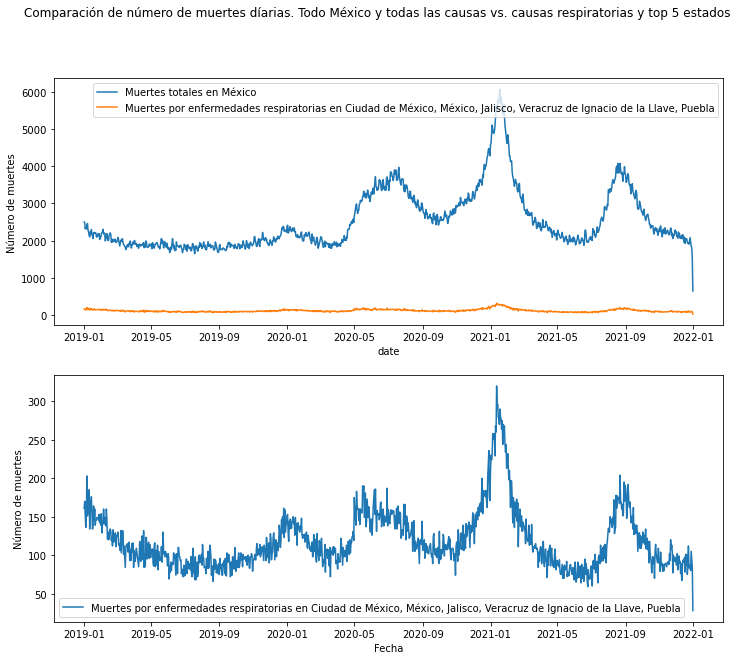

In [24]:
# Comparemos los histogramas, el original con todos los datos de todos los estados y el de nuestro set de muertes debidas a
# causas respiratorias y sólo de los 5 estados con más muertes por esta causa

data1=muertesDf.groupby('date').ent_ocurr.size().to_frame() 
#sns.lineplot(data=data, x=data.index, y=data1.ent_ocurr)

data2=muertesDf_resp_top.groupby('date').estado.size().to_frame() 
#sns.lineplot(data=data, x=data.index, y=data2.estado)

# podemos ver la distribución de las muertes (en todos los estados y por todas las causas):
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(12, 10))
fig.suptitle('Comparación de número de muertes díarias. Todo México y todas las causas vs. causas respiratorias y top 5 estados')
plt.xlabel("Fecha")

label = 'Muertes por enfermedades respiratorias en ' + ", ".join([ i for i in estadosTop5 ])
sns.lineplot(ax=axs[0], data=data1, x=data1.index, y=data1.ent_ocurr, label='Muertes totales en México')
sns.lineplot(ax=axs[0], data=data2, x=data2.index, y=data2.estado, label=label)
sns.lineplot(ax=axs[1], data=data2, x=data2.index, y=data2.estado, label=label)

axs[0].legend()
axs[0].set_ylabel('Número de muertes')
axs[1].set_ylabel('Número de muertes')

## Datos de contaminación en México

In [25]:
## Lectura de datos
# este dataset contiene las mediciones promedio de varios tipos de partículas por día de cada una de las estaciones en todo el país
aire_diario = pd.read_csv("./data/air_mexico/stations_daily.csv")

In [26]:
aire_diario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231592 entries, 0 to 231591
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    231592 non-null  object 
 1   station_id  231592 non-null  int64  
 2   PM2.5       161698 non-null  float64
 3   PM10        180481 non-null  float64
 4   NOx         112881 non-null  float64
 5   O3          192957 non-null  float64
 6   CO          175493 non-null  float64
 7   HR          123285 non-null  float64
 8   NO          118154 non-null  float64
 9   NO2         169286 non-null  float64
 10  TMP         127015 non-null  float64
 11  BEN         775 non-null     float64
 12  CH4         270 non-null     float64
 13  CN          595 non-null     float64
 14  CO2         56 non-null      float64
 15  H2S         280 non-null     float64
 16  HCNM        279 non-null     float64
 17  HCT         0 non-null       float64
 18  HRI         10205 non-null   float64
 19  IU

In [27]:
# pero en este estudio sólo consideremos las lecturas de partículas PM10 y PM2.5:
cols2drop = [ 'NOx', 'O3', 'CO', 'HR', 'NO', 'NO2', 'TMP', 'BEN', 'CH4', 'CN', 'CO2', 'H2S', 'HCNM', 'HCT', 'HRI', 'IUV', 'PB', 'PP', 'PST', 'RS', 'TMPI', 'UVA', 'XIL']
aire_diario.drop(cols2drop,inplace=True, axis=1)
aire_diario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231592 entries, 0 to 231591
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    231592 non-null  object 
 1   station_id  231592 non-null  int64  
 2   PM2.5       161698 non-null  float64
 3   PM10        180481 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.1+ MB


In [28]:
# convirtamos la columna datetime a pandas datetime
print(aire_diario.datetime.head(3))
aire_diario.datetime = pd.to_datetime(aire_diario.datetime)
print(aire_diario.datetime.head(3))

0    2015-04-02
1    2015-05-21
2    2015-05-22
Name: datetime, dtype: object
0   2015-04-02
1   2015-05-21
2   2015-05-22
Name: datetime, dtype: datetime64[ns]


In [29]:
# sólo utilizaremos datos dentro del rango de fechas que tenemos en el dataset de muertes en México así
# que filtremos:
print(aire_diario.shape)
aire_diario = aire_diario[(aire_diario.datetime>muertes_inicio) & (aire_diario.datetime<muertes_fin)]
print(aire_diario.shape)
print('rango de fechas de los datos de contaminación:')
print(aire_diario.datetime.min().strftime('%Y-%m-%d'), ' - ',aire_diario.datetime.max().strftime('%Y-%m-%d'))


(231592, 4)
(73988, 4)
rango de fechas de los datos de contaminación:
2019-01-02  -  2021-12-30


### Estaciones de monitoreo

In [30]:
# este dataset contiene información de las estaciones, varios campos son de dirección pero están muy incompletos
aire_estaciones = pd.read_csv("./data/air_mexico/stations_rsinaica.csv")
print('aire_estaciones.shape():',aire_estaciones.shape)
#print(aire_estaciones.info())
 
# muchas columnas tienem datos incompletos:
aire_estaciones.isna().sum(axis=0).to_frame()

aire_estaciones.shape(): (341, 27)


,0
station_id,0
station_name,0
station_code,0
network_id,0
network_name,7
network_code,1
street,154
ext,187
interior,267
colonia,155


In [31]:
# vamos a quitar todo lo que no usaremos
# nos quedamos con id_station, su nombre y sus coordenadas geográficas
cols2drop = [ 'station_code', 'network_id', 'network_name', 'network_code','street', 'ext', 'interior', 'colonia', 'zip', 'state_code', 'municipio_code','year_started', 'altitude', 'address', 'date_validated', 'date_validated2','passed_validation', 'video','date_started', 'timezone','street_view', 'video_interior', 'color']
aire_estaciones.drop(cols2drop,axis=1,inplace=True)
print(aire_estaciones.info())
aire_estaciones.isna().sum(axis=0).to_frame()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_id    341 non-null    int64  
 1   station_name  341 non-null    object 
 2   lat           316 non-null    float64
 3   lon           316 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.8+ KB
None


,0
station_id,0
station_name,0
lat,25
lon,25


In [32]:
# nos interesa saber en qué estado o municipio se encuentra cada estación, porque queremos saber cuales
# están en los estados de nuestro interés

# sólo 25 estaciones no tienen latitud y longitud (en decimales). trataremos de obtener la información
# de estado o municipio a partir de sus coordenadas geográficas y los datos que tenemos de INEGI de
# Áreas Geoestadísticas Estatales, Municipales y Localidades ya que esos datos cuentan con tienen coordenas geográficas

# iteraramos las estaciones y calculamos qué municipio es el más cercano, tomamos el estado de ese municipio:

aire_estaciones['estado_clave'] = None
aire_estaciones['estado'] = None

import numpy as np
for index,station in aire_estaciones.iterrows():
   
    station_coords = [float(station['lat']),float(station['lon'])]
    if pd.isna(station_coords[0]) or  pd.isna(station_coords[1]):
        pass
    else:
        # usamos distancia euclidiana para mapear a la ubicacion geoestadística más cercana
        min_dist_index = (geoDf[['LAT_DECIMAL','LON_DECIMAL']] - np.array(station_coords)).pow(2).sum(1).pow(0.5).argmin()
        if False:
            print()
            print(station.station_name)
            print(station_coords, geoDf.iloc[min_dist_index][['LAT_DECIMAL','LON_DECIMAL']].to_numpy())
            print(geoDf.iloc[min_dist_index][['estado','CVE_ENT','NOM_ENT','NOM_MUN']].to_numpy())
        aire_estaciones.loc[index,'estado_clave'] = int(geoDf.iloc[min_dist_index].CVE_ENT)
        aire_estaciones.loc[index,'estado'] = geoDf.iloc[min_dist_index].estado
        



In [33]:
# ejemplo de datos de una estación
aire_estaciones.iloc[21]

station_id            223
station_name      Apizaco
lat                 19.42
lon            -98.145278
estado_clave           29
estado               tlax
Name: 21, dtype: object

In [34]:
# estaciones de CDMX
estacionesCDMX = aire_estaciones[aire_estaciones.estado=='cdmx']
print(estacionesCDMX.shape[0])
estacionesCDMX.head()

32


,station_id,station_name,lat,lon,estado_clave,estado
276,242,Ajusco Medio,19.272222,-99.207778,9,cdmx
277,241,Ajusco,19.154286,-99.162778,9,cdmx
280,315,Azcapotzalco,19.489389,-99.198972,9,cdmx
281,300,Benito Juárez,19.371667,-99.159167,9,cdmx
282,244,Camarones,19.468611,-99.170000,9,cdmx


In [35]:
# número de estaciones que hay por estado (después veremos que muchas no tienen datos)
#aire_estaciones.groupby(['eq6_ent_nom','eq6_ent_cve']).size()
aire_estaciones.groupby(['estado']).size()

estado
ags      6
bc      19
camp     1
cdmx    32
chih    17
chis     3
coah     9
col      1
dgo     11
gro      1
gto     27
hgo     24
jal     10
mex     44
mich     4
mor      4
nay      3
nl      13
oax      2
pue      6
qro      8
sin     15
slp      4
son      4
tab     11
tamp    19
tlax     6
ver      5
yuc      1
zac      6
dtype: int64

In [36]:
# ahora tenemos la tabla de estaciones con los datos completos que necesitaremos y podemos hacer merge
# con la tabla de medidas diarias de condiciones del aire.
# la tabla nueva contendrá la infomrmación del estado donde se tomó la medición
aire_diario_wstations = pd.merge(aire_diario, aire_estaciones, how='left', on='station_id')

# ya no necesitamos lat ni lon
aire_diario_wstations.drop(['lat','lon'],axis=1,inplace=True)

aire_diario = aire_diario_wstations
aire_diario.head()

,datetime,station_id,PM2.5,PM10,station_name,estado_clave,estado
0,2019-01-02,32,0.036260,0.386339,Secretaría de Medio Ambiente,1,ags
1,2019-01-03,32,0.031708,0.565657,Secretaría de Medio Ambiente,1,ags
2,2019-01-04,32,0.038459,0.429684,Secretaría de Medio Ambiente,1,ags
3,2019-01-05,32,0.439551,0.753832,Secretaría de Medio Ambiente,1,ags
4,2019-01-06,32,1.001204,0.765408,Secretaría de Medio Ambiente,1,ags


In [37]:
# ahora filtemos para tener solo nuestros estados de interés:
aire_diario = aire_diario.loc[aire_diario.estado.isin(estadosTop5Clave)]
aire_diario

,datetime,station_id,PM2.5,PM10,station_name,estado_clave,estado
18923,2019-01-08,102,NaN,NaN,Centro,14,jal
18924,2019-01-09,102,NaN,NaN,Centro,14,jal
18925,2019-01-10,102,NaN,78.700250,Centro,14,jal
18926,2019-01-11,102,19.320886,45.517637,Centro,14,jal
18927,2019-01-12,102,19.262604,29.540292,Centro,14,jal
...,...,...,...,...,...,...,...
62571,2021-12-26,302,NaN,NaN,Gustavo A. Madero,9,cdmx
62572,2021-12-27,302,NaN,NaN,Gustavo A. Madero,9,cdmx
62573,2021-12-28,302,NaN,NaN,Gustavo A. Madero,9,cdmx
62574,2021-12-29,302,NaN,NaN,Gustavo A. Madero,9,cdmx


In [38]:
# vemos cuantas lecturas tiene cada estado tomando en cuenta todas las estaciones de ese estado
aire_diario.groupby(['estado']).size()

estado
cdmx    9476
jal     4223
mex     8157
pue     2724
ver     2067
dtype: int64

In [39]:
# valores vacíos
aire_diario.isna().sum(axis=0)

datetime           0
station_id         0
PM2.5           5946
PM10            8892
station_name       0
estado_clave       0
estado             0
dtype: int64

In [40]:
# vemos cuantas lecturas tiene cada estación de cada estado
aire_diario.groupby(['estado'])['station_id'].value_counts()

estado  station_id
cdmx    256           1071
        245           1055
        263           1050
        269           1047
        302           1008
        262            986
        268            964
        244            915
        242            545
        251            544
        241            291
jal     109           1090
        103           1070
        106           1060
        102           1003
mex     123           1094
        125           1094
        128           1082
        266           1078
        126           1077
        258           1030
        260            914
        271            432
        301            356
pue     162           1086
        161            869
        163            769
ver     234           1066
        291           1001
Name: station_id, dtype: int64

## Merge de muertes con contaminación

<AxesSubplot: xlabel='cdmx', ylabel='Fecha'>

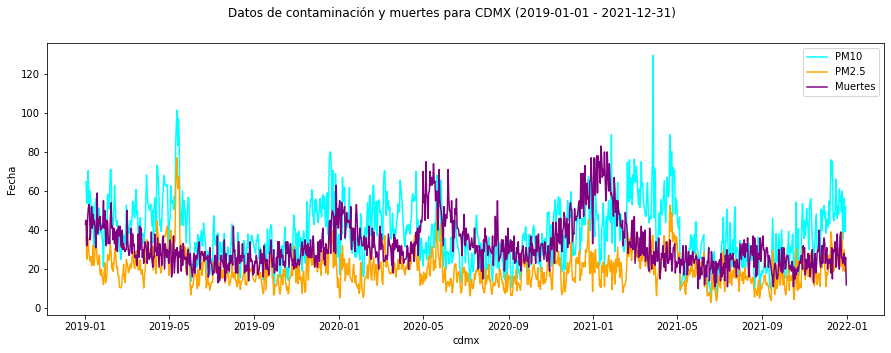

In [41]:
# promedios diarios de lecturas para un estado (de todas las estaciones):
estado = 'cdmx'
dataPM10 = aire_diario[aire_diario.estado==estado].groupby('datetime')['PM10'].mean().to_frame()
dataPM25 = aire_diario[aire_diario.estado==estado].groupby('datetime')['PM2.5'].mean().to_frame()

# suma de muertes en por día en un estado:
dataMuertes = muertesDf_resp_top[muertesDf_resp_top.estado==estado].groupby('date').size().to_frame().rename(columns={0:'Muertes'})

fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(15, 5))
fig.suptitle('Datos de contaminación y muertes para '+estado.upper()+' ('+ muertes_inicio.strftime('%Y-%m-%d')+' - '+muertes_fin.strftime('%Y-%m-%d')+')')
plt.ylabel("Fecha")
plt.xlabel(estado)

sns.set_palette("PuBuGn_d")

data=dataPM10
sns.lineplot(data=data, palette=['cyan'])

data=dataPM25
sns.lineplot(data=data, palette=['orange'])

data=dataMuertes
sns.lineplot(data=data, palette=['purple'])

In [42]:
# el proceso siguiente hará una tabla que consolide la información que necesitamos para el resto de nuestro analisis
# realizamos un merge para los estados que decidimos analizar en una serie de tiempo:

# este es una time series vacía con fechas diarias de inicio y fin que hemos estado usando
myc_consolidado_index = pd.date_range(muertes_inicio,muertes_fin,freq='D')
myc_consolidado = pd.DataFrame(index=myc_consolidado_index)

for estado in estadosTop5Clave: # ['cdmx','mex','pue', 'jal', 'ver']
    # promedio diario de todas las estaciones de un estado:
    dataPM10 = aire_diario[aire_diario.estado==estado].groupby('datetime')['PM10'].mean().to_frame()
    dataPM25 = aire_diario[aire_diario.estado==estado].groupby('datetime')['PM2.5'].mean().to_frame()
    # para las muertes es diferente porque aquí cada fila es una muerte y hay que sumarlas en vez de promediarlas:
    dataMuertes = muertesDf_resp_top[muertesDf_resp_top.estado==estado].groupby('date').size().to_frame().rename(columns={0:'Muertes'})
    # hacemos merge usando la FECHA como llave común:
    myc_consolidado = pd.merge(myc_consolidado,dataMuertes,left_index=True, right_index=True, how='left')
    myc_consolidado = pd.merge(myc_consolidado,dataPM10,left_index=True, right_index=True, how='left')
    myc_consolidado = pd.merge(myc_consolidado,dataPM25,left_index=True, right_index=True, how='left')
    myc_consolidado.rename(columns={'Muertes':'muertes_'+estado,'PM10':'pm10_'+estado,'PM2.5':'pm2.5_'+estado},inplace=True)


# !Lo logramos!
## Tenemos un dataset consolidado con información de contaminación con datos de estaciones completos y muertes por día.

In [43]:
# podemos ver cu[antos registros y de qu[e columnas tienen datos incompletos:
myc_consolidado.isna().sum(axis=0)

muertes_cdmx      0
pm10_cdmx        17
pm2.5_cdmx       17
muertes_mex       0
pm10_mex          2
pm2.5_mex         2
muertes_jal       0
pm10_jal         87
pm2.5_jal       126
muertes_ver       0
pm10_ver        111
pm2.5_ver        13
muertes_pue       0
pm10_pue         18
pm2.5_pue        65
dtype: int64

In [44]:
# aquí vemos un ejemplo del máximo valor de PM10 para Jalisco que es sumamente improbable:
myc_consolidado.loc[myc_consolidado.pm10_jal.idxmax()]

muertes_cdmx      32.000000
pm10_cdmx         36.996839
pm2.5_cdmx        12.452339
muertes_mex       32.000000
pm10_mex          67.997736
pm2.5_mex         21.638486
muertes_jal       33.000000
pm10_jal        6815.562413
pm2.5_jal         24.452214
muertes_ver       20.000000
pm10_ver          46.375000
pm2.5_ver         24.166667
muertes_pue        5.000000
pm10_pue          34.974005
pm2.5_pue         16.646863
Name: 2020-01-29 00:00:00, dtype: float64

In [45]:
# como estos valores tan extremos hay otros en nuestros datos y probablemente se deben a errores de instrumentos
# de medición

# definimos un cutoff value y para cada columna de pm10 y pm2.5 remplazemos por numpy.nan:
limite_mas_alto_permitido = 120
data = myc_consolidado
data_fields_to_clean = 'pm10' # encontrará las columnas que contengan este substring en su nombre
for field in [ c for c in list(data) if data_fields_to_clean in c]:
    print('limpiando valores para ',field)
    data.loc[(data[field] > limite_mas_alto_permitido),field]=np.nan
    
data_fields_to_clean = 'pm2.5'
for field in [ c for c in list(data) if data_fields_to_clean in c]:
    print('limpiando valores para ',field)
    data.loc[(data[field] > limite_mas_alto_permitido),field]=np.nan


limpiando valores para  pm10_cdmx
limpiando valores para  pm10_mex
limpiando valores para  pm10_jal
limpiando valores para  pm10_ver
limpiando valores para  pm10_pue
limpiando valores para  pm2.5_cdmx
limpiando valores para  pm2.5_mex
limpiando valores para  pm2.5_jal
limpiando valores para  pm2.5_ver
limpiando valores para  pm2.5_pue


In [46]:
# vemos nuevamente cu[antos registros y de qu[e columnas tienen datos incompletos (ahora hay más porque los añadimos):
myc_consolidado.isna().sum(axis=0)

muertes_cdmx      0
pm10_cdmx        18
pm2.5_cdmx       17
muertes_mex       0
pm10_mex          3
pm2.5_mex         2
muertes_jal       0
pm10_jal         96
pm2.5_jal       127
muertes_ver       0
pm10_ver        164
pm2.5_ver       100
muertes_pue       0
pm10_pue         33
pm2.5_pue        74
dtype: int64

In [47]:
# rellenamos los nan que introdujimos y los que ya estaban presentes
myc_consolidado = myc_consolidado.interpolate()
#myc_consolidado = myc_consolidado.ffill()
# vemos nuevamente cu[antos registros y de qu[e columnas tienen datos incompletos:
myc_consolidado.isna().sum(axis=0)

muertes_cdmx    0
pm10_cdmx       1
pm2.5_cdmx      1
muertes_mex     0
pm10_mex        1
pm2.5_mex       1
muertes_jal     0
pm10_jal        1
pm2.5_jal       1
muertes_ver     0
pm10_ver        1
pm2.5_ver       7
muertes_pue     0
pm10_pue        1
pm2.5_pue       1
dtype: int64

<AxesSubplot: xlabel='ver', ylabel='Fecha'>

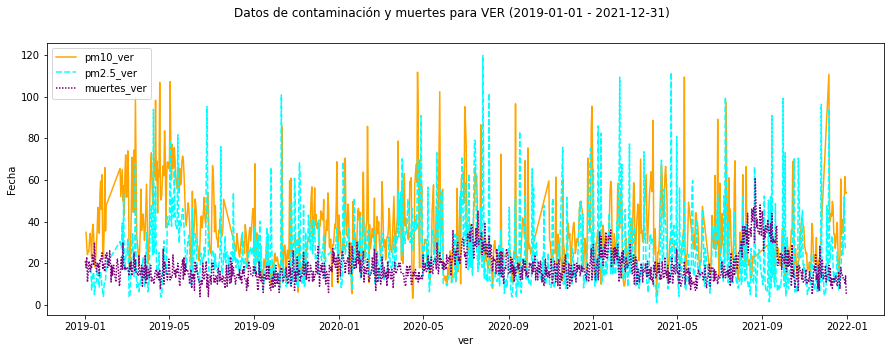

In [48]:
# promedios diarios de lecturas para un estado (de todas las estaciones):
estado = 'ver'

fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(15, 5))
fig.suptitle('Datos de contaminación y muertes para '+estado.upper()+' ('+ muertes_inicio.strftime('%Y-%m-%d')+' - '+muertes_fin.strftime('%Y-%m-%d')+')')
plt.ylabel("Fecha")
plt.xlabel(estado)

sns.lineplot(data=myc_consolidado[['pm10_'+estado,'pm2.5_'+estado,'muertes_'+estado]], palette = ['orange','cyan','purple'])


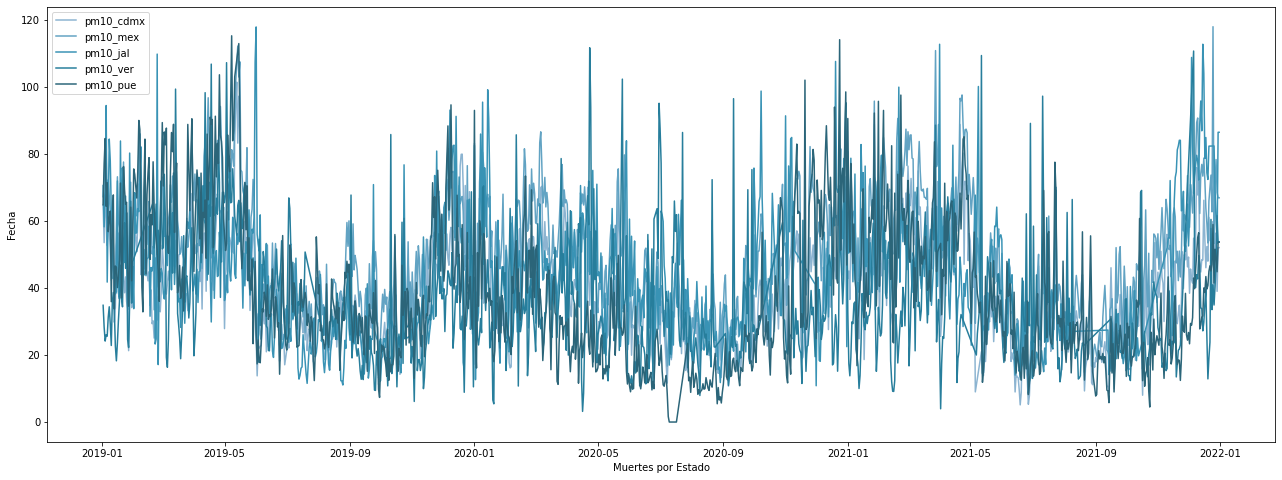

In [49]:
# veamos las gr[aficas de muertes en cada uno de los estados seleccionados
fig, axs = plt.subplots(figsize=(22, 8))
plt.ylabel("Fecha")
plt.xlabel("Muertes por Estado")
data = myc_consolidado
field = 'pm10'
for col in [ c for c in list(data) if field in c]:
    sns.lineplot(data=myc_consolidado, x=myc_consolidado.index, y=col, label=col)

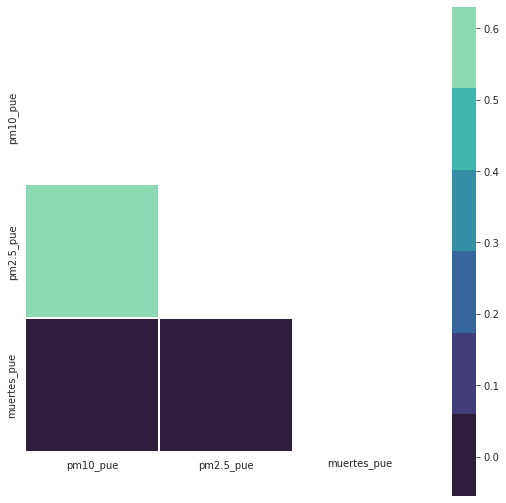

In [50]:
# graficaremos las correlaciones de niveles de contaminación contra muertes
estado = 'pue'
plt.figure(figsize=(9,9))
my_corr = myc_consolidado[['pm10_'+estado,'pm2.5_'+estado,'muertes_'+estado]].corr() 
mask = np.zeros_like(my_corr) 
mask[np.triu_indices_from(mask)] = True 
with sns.axes_style("white"):
     ax = sns.heatmap(my_corr, mask=mask, square=True, cmap=sns.color_palette('mako'), vmax=np.max(np.sort(my_corr.values)[:,-2]), linewidths=0.3)

In [51]:
myc_consolidado.groupby(myc_consolidado.index.year)['muertes_cdmx'].sum()


2019    10742
2020    13779
2021    10871
Name: muertes_cdmx, dtype: int64

## Otras formas de visualizar los datos

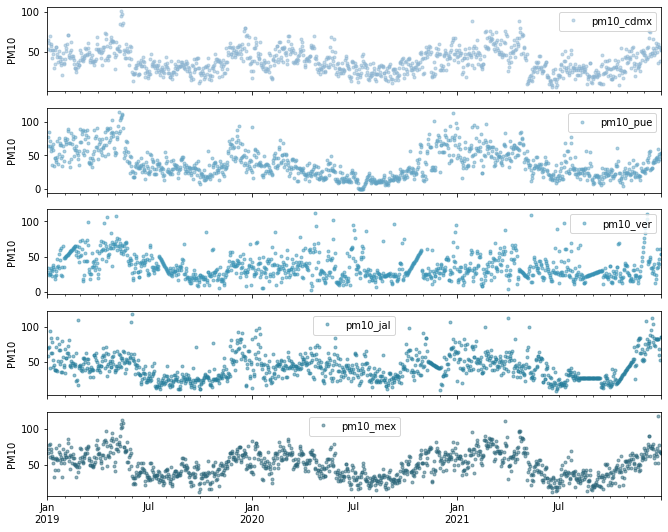

In [52]:
cols_plot = ['pm10_cdmx', 'pm10_pue','pm10_ver','pm10_jal','pm10_mex']
axes = myc_consolidado[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('PM10')

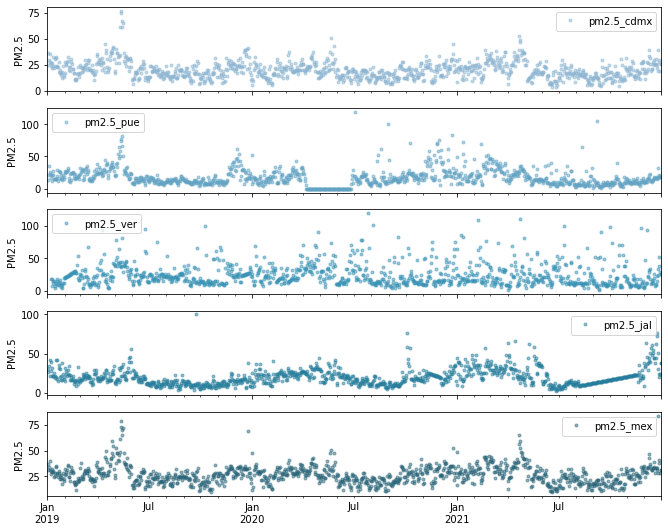

In [53]:
cols_plot = ['pm2.5_cdmx', 'pm2.5_pue','pm2.5_ver','pm2.5_jal','pm2.5_mex']
axes = myc_consolidado[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('PM2.5')

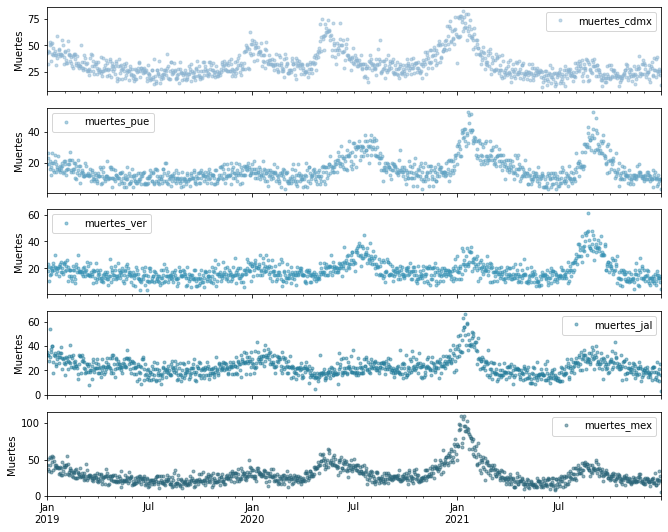

In [54]:
cols_plot = ['muertes_cdmx', 'muertes_pue','muertes_ver','muertes_jal','muertes_mex']
axes = myc_consolidado[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Muertes')

## Estacionalidad en datos de partículas

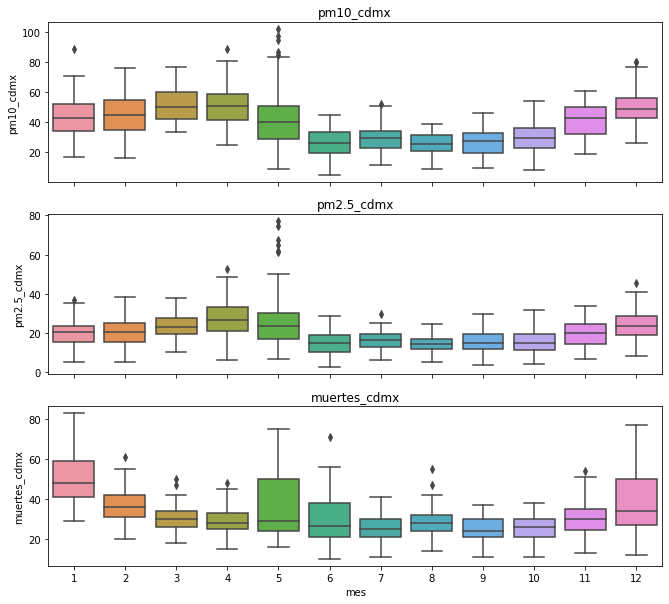

In [55]:
# por mes
myc_consolidado['mes'] = myc_consolidado.index.month
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['pm10_cdmx', 'pm2.5_cdmx', 'muertes_cdmx'], axes):
    sns.boxplot(data=myc_consolidado, x='mes', y=name, ax=ax)
    #ax.set_ylabel('')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

## Corelación entre series de tiempo

Correlación de muertes con PM10 para VER: -0.09047861591556429


<Figure size 936x648 with 0 Axes>

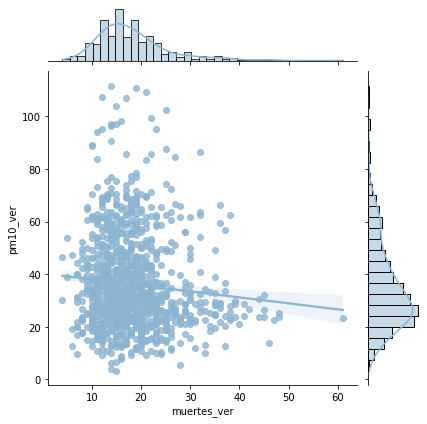

In [56]:
estado='ver'
correlacion = myc_consolidado['muertes_'+estado].corr(myc_consolidado['pm10_'+estado])
print('Correlación de muertes con PM10 para '+estado.upper()+':',correlacion)

plt.figure(figsize=(13,9))
x=myc_consolidado['muertes_'+estado]
y=myc_consolidado['pm10_'+estado]
sns.jointplot(data=myc_consolidado, x=x, y=y, kind="reg")


## Conclusiones

En este proyecto nos enfocamos mucho en el proceso de manipulación y limpieza de datos. Este proceso puede ser una labor extenuante, pero resulta necesaria en muchas ocasiones para poder analizar los datos de maneras más limpias y ordenadas. 

Con este trabajo se consolidó un set de datos final permite explorar los datos de maneras que eran imposibles en un comienzo.

Takeaways:
- Es importante definir un objetivo, ya sea para el set de datos final o para los análisis que se desean hacer
- Se deben asignar nombres simples pero descripivos a las variables
- Muchos procesos se pueden simplificar a través de ciclos
- Mientras más funciones se conozcan de Numpy y Pandas, más fácilmente se puede avanzar en todo este proceso

